# Look at pangenome size reduction via clustering

One of the first steps in the HGT discovery pipeline builds a genus-level "pangenome" from the input genes by clustering at 90% length and 90% identity.
While this may collapse true biological variation (genes with shared evolutionary history that have functionally diverged), we posit that this does not impede our ability to detect HGT events and can dramatically speed up HGT detection when there are many closely related genomes in the database.

This database visualizes how clustering decreases the size of the input pangenome.

In [10]:
library(readr)
library(dplyr, warn.conflicts = F)
library(ggplot2)
library(purrr)
library(tidyr)

In [2]:
setwd("..")

In [18]:
# adjust plot size rendered inline
options(repr.plot.width = 5, repr.plot.height = 6, repr.plot.res = 300)

In [6]:
pangenome <- Sys.glob("outputs/genus_pangenome_clustered/*_cluster.tsv") %>%
  set_names() %>%
  map_dfr(read_tsv, show_col_types = F, col_names = c("rep", "gene"), .id = "genus") %>%
  mutate(genus = gsub("_cds_cluster.tsv", "", basename(genus))) 

In [7]:
pangenome_totals <- pangenome %>%
  group_by(genus) %>%
  tally() %>%
  select(genus, num_genes = n)

In [8]:
pangenome_clustered <- pangenome %>%
  group_by(genus, rep) %>%
  tally() %>%
  ungroup() %>%
  group_by(genus) %>%
  tally() %>%
  select(genus, num_clustered_genes = n)

In [11]:
all <- left_join(pangenome_totals, pangenome_clustered) %>%
  mutate(difference = num_genes - num_clustered_genes) %>%
  select(genus, num_clustered_genes, difference) %>%
  pivot_longer(cols = -genus, names_to = "type", values_to = "genes")

Joining, by = "genus"


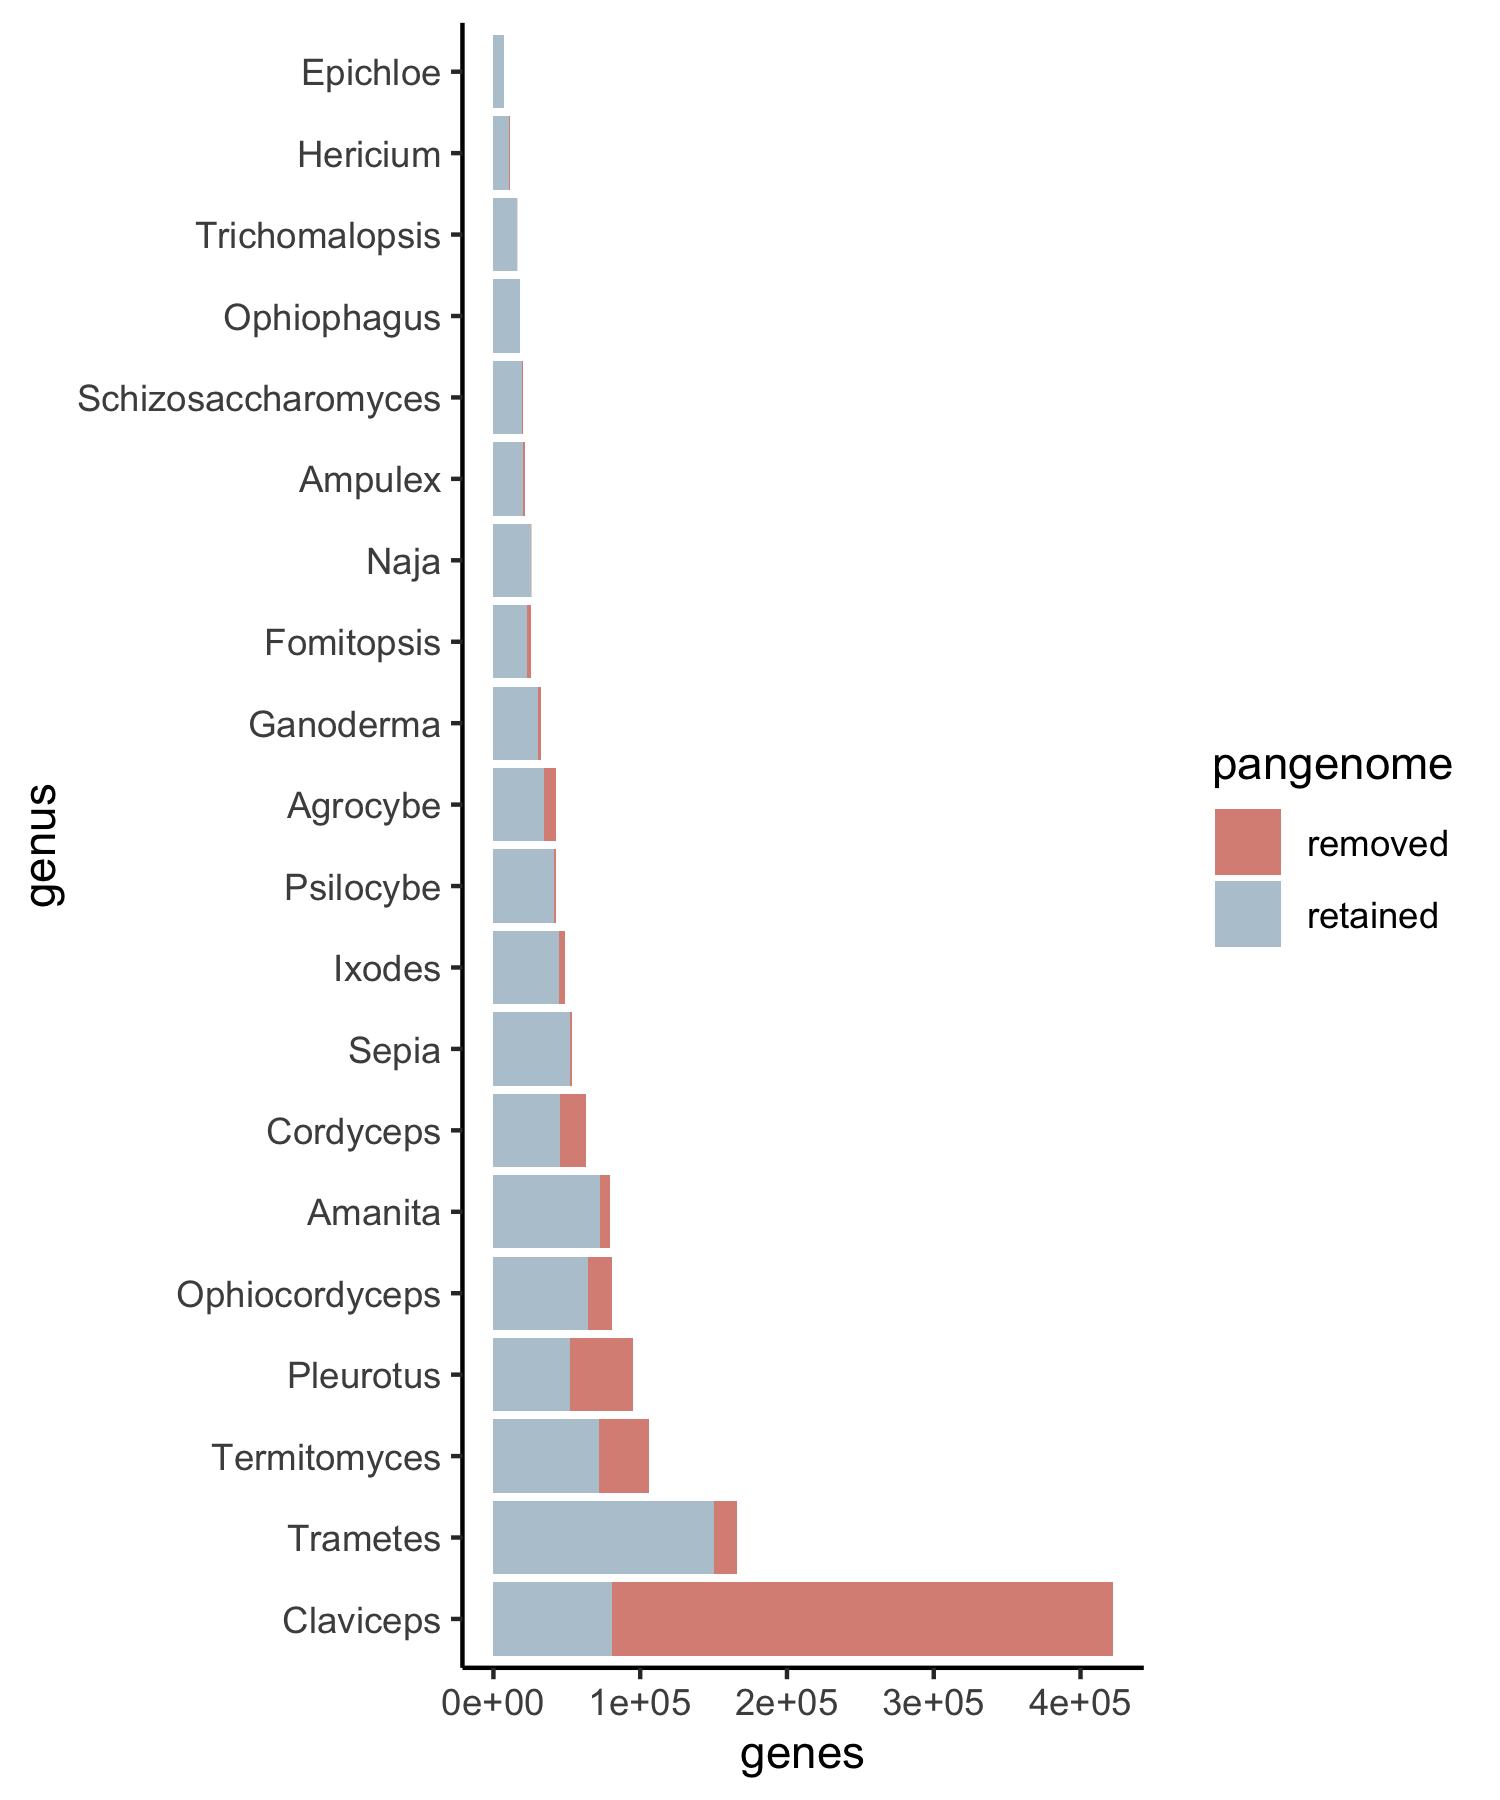

In [19]:
ggplot(all %>% filter(!genus %in% c("Microplitis", "Bothrops")), 
       aes(x = reorder(genus, -genes), y = genes, fill = type)) +
  geom_col() +
  theme_classic() +
  coord_flip() +
  labs(x = "genus", fill = "pangenome") +
  scale_fill_manual(labels = c("removed", "retained"),
                    values = c("#DA9085", "#B6C8D4"))

In [15]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidyr_1.2.1   purrr_1.0.1   ggplot2_3.4.0 dplyr_1.0.10  readr_2.1.3  

loaded via a namespace (and not attached):
 [1] pillar_1.8.1     compiler_4.2.1   base64enc_0.1-3  tools_4.2.1     
 [5] bit_4.0.5        digest_0.6.31    uuid_1.1-0       jsonlite_1.8.4  
 [9] evaluate_0.20    lifecycle_1.0.3  tibble_3.1.8     gtable_0.3.1    
[13] pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1    cli_3.6.0       
[17] DBI_1.1.3        parallel_4.2.1   IRkernel_1.3     fastmap_1.1.0   
[21] withr_2.5.0      repr_1.1.4       generics_0.1.3   vctrs_0.5.1     
[25] hms_1.1.